### Handwritten Digit Classifier¶
#### Written by: Jean Pierre C. Aldama
#### Date: 3/7/2020 6:40 AM
##### [Quaxis Research/Innovation]
#### Description: This notebook classifies handwritten digit images as a number 0 - 9 Using Convolutional Neural Networks. Same as the ANN's notebook minus ANN's
### Requirements: pip install tensorflow keras numpy mnist matplotlib
##### we recommend installing the latest version of Anaconda which can be downloaded at https://www.anaconda.com/distribution/#download-section (We are using Anaconda for python 3.x)

### Step 1: Import required libraries

In [80]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load the data, split it into train and test datasets 

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Step 3: Get the image shape 

In [44]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


 ### Step 4: Peek at the first image @ index 0 in the training dataset 

In [45]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Step 5: Print the image label

5


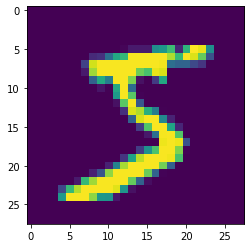

In [46]:
print(y_train[0])
plt.imshow(x_train[0])

### Step 6: Reshape the data to fir the model

In [49]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

### Step 7: One Hot Encoding, print the new label

In [51]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Step 8: Build the CNN model

In [109]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

### Step 9: Compile the model

In [110]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Step 10: Train the model

In [111]:
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 149s 2ms/step - loss: 0.2622 - accuracy: 0.9514 - val_loss: 0.0942 - val_accuracy: 0.9719
Epoch 2/3
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0719 - accuracy: 0.9788 - val_loss: 0.0794 - val_accuracy: 0.9752
Epoch 3/3
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.1000 - val_accuracy: 0.9772


### Step 11: Visualize the models accuracy

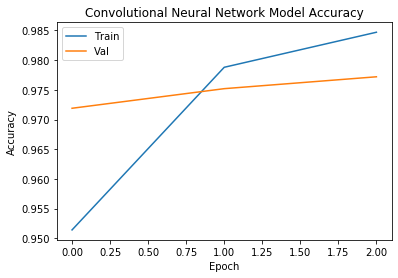

In [166]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Convolutional Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Step 12: Show predictions as probabilities for the first 5 images in the test data set

In [159]:
predictions = model.predict(x_test[:5])

### Step 13: Print predictions as number labels for the first 5 images then print the actual labels

In [161]:
prediction_label = np.argmax(predictions, axis=1)
actual_label = y_test[:5]
print(prediction_label)
print(actual_label)

[7 2 1 0 4]
[7 2 1 0 4]


### Step 14: Show the first 5 images as plot images

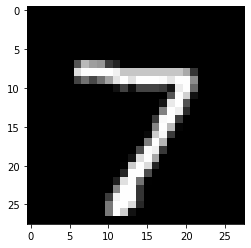

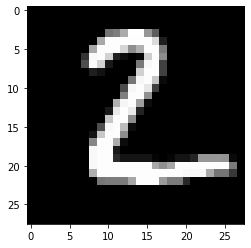

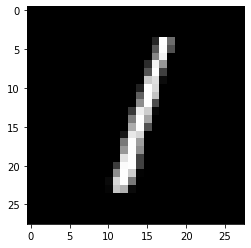

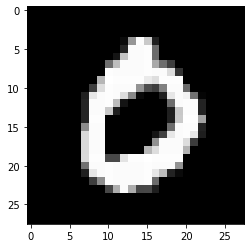

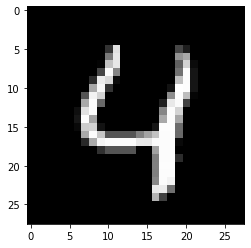

In [165]:
for i in range(0,5):
    image = x_test[i]
    image = np.array(image,dtype='float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()